# Import Dataset and Dependencies

In [ ]:
!pip install jupyterthemes

In [1]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/naufalkr/XAI-erp-transaction-anomaly/main/financial_anomaly_data.csv')
df.shape

(217441, 7)

In [3]:
df.head()

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [4]:
df.tail()

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
217436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217440,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.count()

,0
Timestamp,216960
TransactionID,216960
AccountID,216960
Amount,216960
Merchant,216960
TransactionType,216960
Location,216960


In [6]:
df.dtypes

,0
Timestamp,object
TransactionID,object
AccountID,object
Amount,float64
Merchant,object
TransactionType,object
Location,object


In [7]:
df.describe()

,Amount
count,216960.000000
mean,50090.025108
std,29097.905016
min,10.510000
25%,25061.242500
50%,50183.980000
75%,75080.460000
max,978942.260000


# 2. Handling Missing Value


In [8]:
df.isna().sum()

,0
Timestamp,481
TransactionID,481
AccountID,481
Amount,481
Merchant,481
TransactionType,481
Location,481


In [9]:
value_counts = {column: df[column].value_counts() for column in df.columns}
value_counts

{'Timestamp': Timestamp
 01-01-2023 08:00    1
 11-04-2023 18:57    1
 11-04-2023 18:33    1
 11-04-2023 18:34    1
 11-04-2023 18:35    1
                    ..
 20-02-2023 13:23    1
 20-02-2023 13:24    1
 20-02-2023 13:25    1
 20-02-2023 13:26    1
 31-05-2023 23:59    1
 Name: count, Length: 216960, dtype: int64,
 'TransactionID': TransactionID
 TXN838     139
 TXN1768    139
 TXN1658    139
 TXN1389    138
 TXN340     137
           ... 
 TXN60       79
 TXN891      78
 TXN605      78
 TXN201      73
 TXN799      70
 Name: count, Length: 1999, dtype: int64,
 'AccountID': AccountID
 ACC15    14701
 ACC5     14630
 ACC7     14581
 ACC2     14553
 ACC9     14527
 ACC14    14458
 ACC4     14456
 ACC11    14446
 ACC12    14421
 ACC13    14421
 ACC8     14402
 ACC1     14365
 ACC10    14362
 ACC6     14352
 ACC3     14285
 Name: count, dtype: int64,
 'Amount': Amount
 18010.00    3
 34588.69    3
 74109.74    3
 86099.64    3
 7309.50     3
            ..
 56652.57    1
 36336.36    1

In [10]:
df.isna().sum()

,0
Timestamp,481
TransactionID,481
AccountID,481
Amount,481
Merchant,481
TransactionType,481
Location,481


In [11]:
transaction_counts = df['TransactionType'].value_counts()

# Display the counts
print(transaction_counts)

TransactionType
Transfer      72793
Purchase      72235
Withdrawal    71932
Name: count, dtype: int64


In [12]:
df = df.dropna()
df.isna().sum()

,0
Timestamp,0
TransactionID,0
AccountID,0
Amount,0
Merchant,0
TransactionType,0
Location,0


In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,2023-01-01 08:00:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,2023-01-01 08:01:00,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,2023-01-01 08:02:00,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,2023-01-01 08:03:00,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,2023-01-01 08:04:00,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,2023-05-31 23:55:00,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,2023-05-31 23:56:00,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,2023-05-31 23:57:00,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,2023-05-31 23:58:00,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


In [14]:
df.count()

,0
Timestamp,216960
TransactionID,216960
AccountID,216960
Amount,216960
Merchant,216960
TransactionType,216960
Location,216960


In [52]:
df.iloc[9]

,9
Timestamp,2023-01-01 08:09:00
TransactionID,TXN1479
AccountID,ACC12
Amount,49522.74
Merchant,MerchantC
TransactionType,Withdrawal
Location,New York


# Exploratory Data Analysis (EDA)

<Axes: xlabel='Timestamp'>

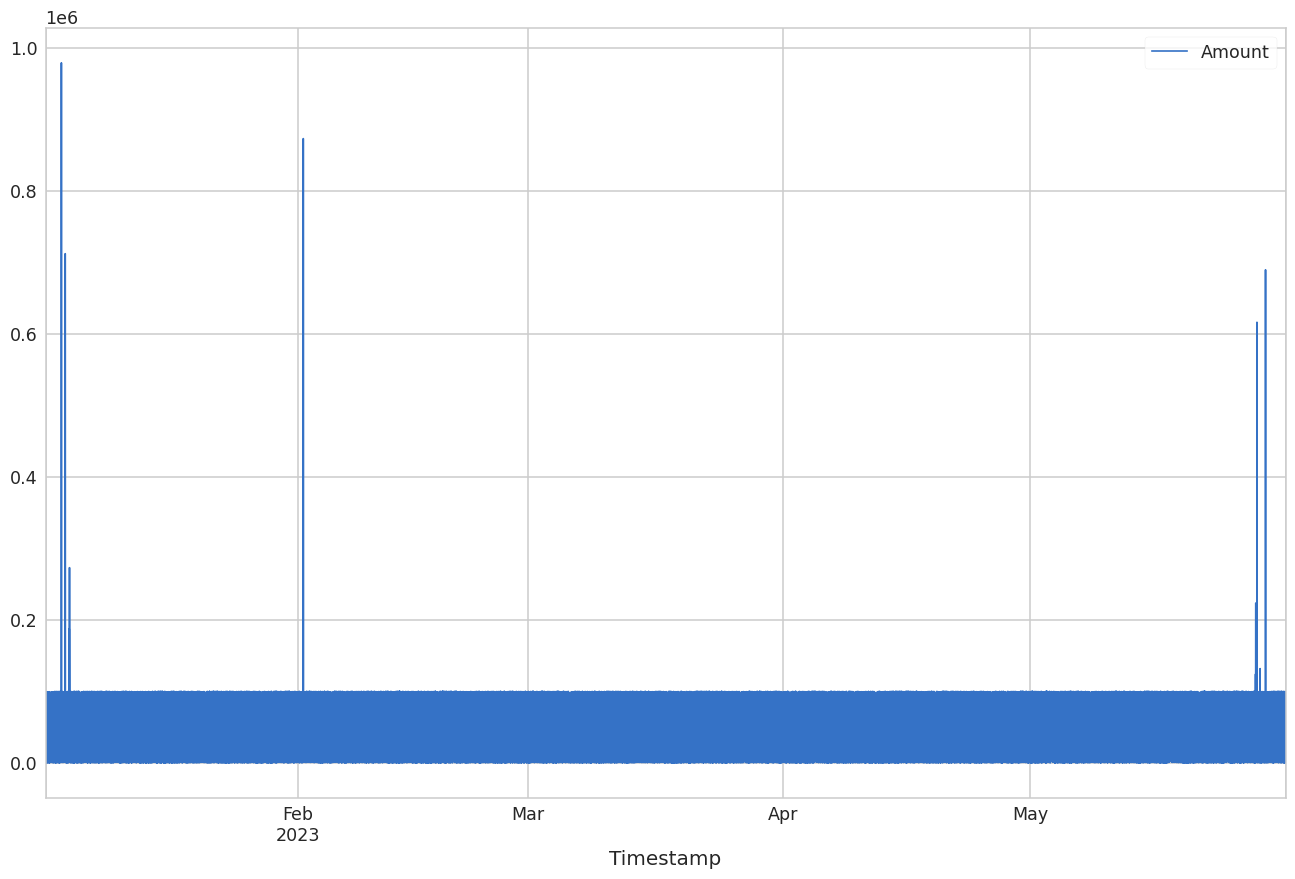

In [16]:
# Transaction based on timestamp
df.set_index('Timestamp').plot(figsize=(16, 10))

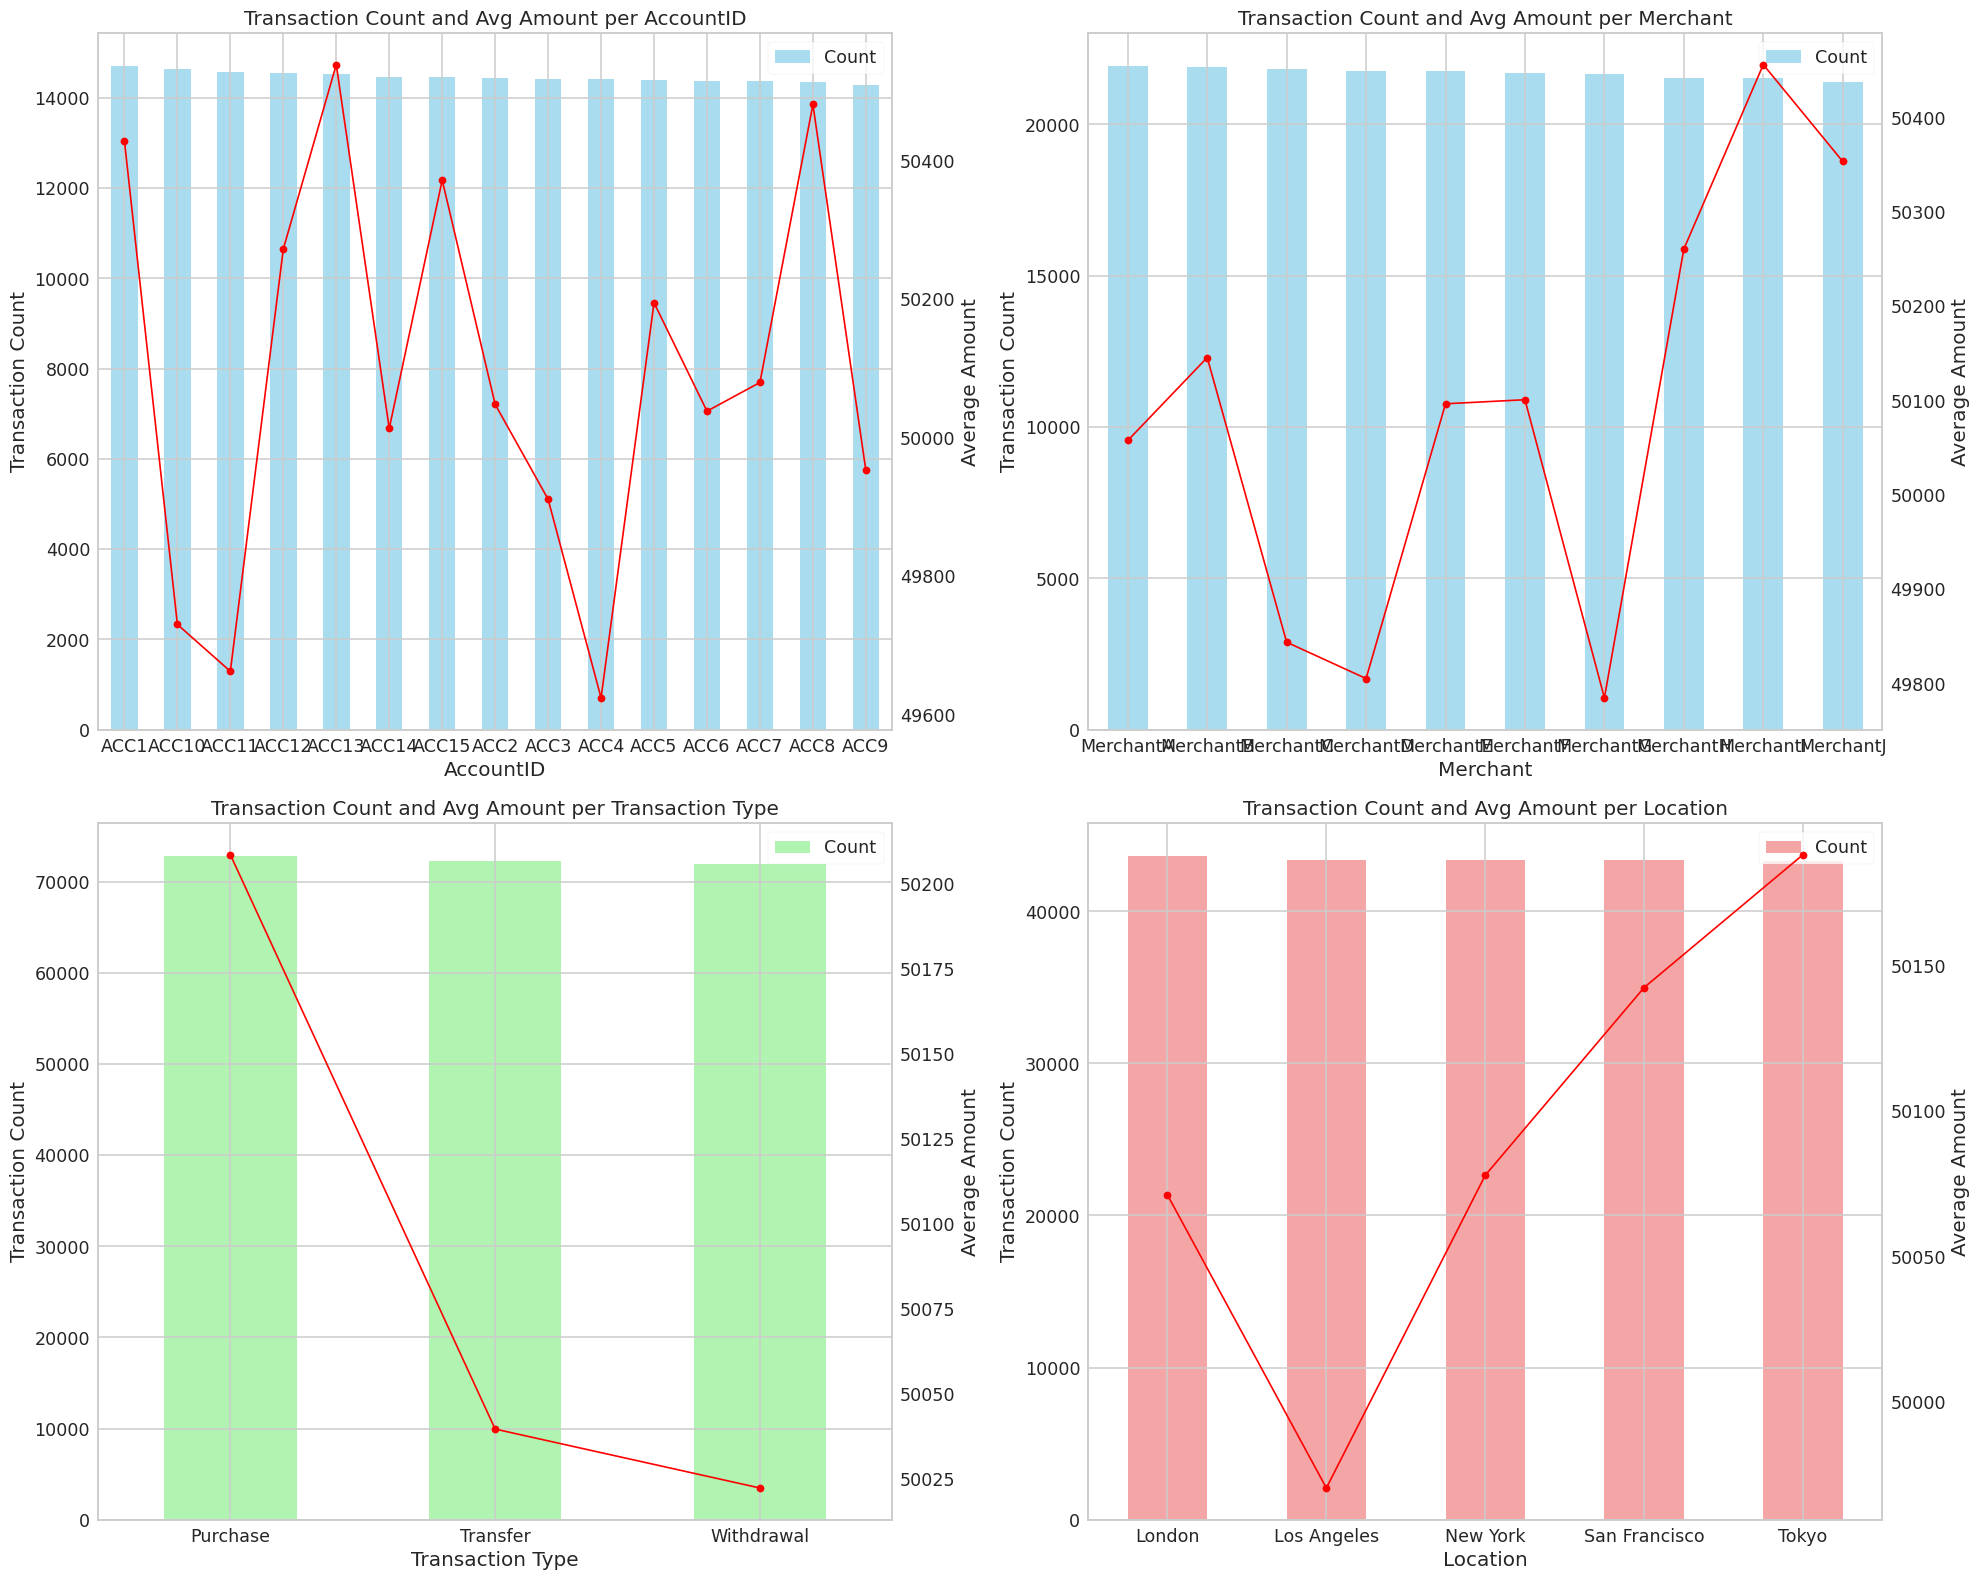

In [17]:
import matplotlib.pyplot as plt

# Set up a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 2: AccountID distribution - Count and Average Amount
AccountID_counts = df['AccountID'].value_counts()
AccountID_avg_amount = df.groupby('AccountID')['Amount'].mean()
AccountID_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue', alpha=0.7, label='Count')
AccountID_avg_amount.plot(kind='line', marker='o', secondary_y=True, ax=axes[0, 0], color='red', label='Avg Amount')
axes[0, 0].set_title("Transaction Count and Avg Amount per AccountID")
axes[0, 0].set_xlabel("AccountID")
axes[0, 0].set_ylabel("Transaction Count")
axes[0, 0].right_ax.set_ylabel("Average Amount")
axes[0, 0].legend()

# Plot 2: Merchant distribution - Count and Average Amount
merchant_counts = df['Merchant'].value_counts()
merchant_avg_amount = df.groupby('Merchant')['Amount'].mean()
merchant_counts.plot(kind='bar', ax=axes[0, 1], color='skyblue', alpha=0.7, label='Count')
merchant_avg_amount.plot(kind='line', marker='o', secondary_y=True, ax=axes[0, 1], color='red', label='Avg Amount')
axes[0, 1].set_title("Transaction Count and Avg Amount per Merchant")
axes[0, 1].set_xlabel("Merchant")
axes[0, 1].set_ylabel("Transaction Count")
axes[0, 1].right_ax.set_ylabel("Average Amount")
axes[0, 1].legend()

# Plot 3: Transaction Type distribution - Count and Average Amount
type_counts = df['TransactionType'].value_counts()
type_avg_amount = df.groupby('TransactionType')['Amount'].mean()
type_counts.plot(kind='bar', ax=axes[1, 0], color='lightgreen', alpha=0.7, label='Count')
type_avg_amount.plot(kind='line', marker='o', secondary_y=True, ax=axes[1, 0], color='red', label='Avg Amount')
axes[1, 0].set_title("Transaction Count and Avg Amount per Transaction Type")
axes[1, 0].set_xlabel("Transaction Type")
axes[1, 0].set_ylabel("Transaction Count")
axes[1, 0].right_ax.set_ylabel("Average Amount")
axes[1, 0].legend()

# Plot 4: Location distribution - Count and Average Amount
location_counts = df['Location'].value_counts()
location_avg_amount = df.groupby('Location')['Amount'].mean()
location_counts.plot(kind='bar', ax=axes[1, 1], color='lightcoral', alpha=0.7, label='Count')
location_avg_amount.plot(kind='line', marker='o', secondary_y=True, ax=axes[1, 1], color='red', label='Avg Amount')
axes[1, 1].set_title("Transaction Count and Avg Amount per Location")
axes[1, 1].set_xlabel("Location")
axes[1, 1].set_ylabel("Transaction Count")
axes[1, 1].right_ax.set_ylabel("Average Amount")
axes[1, 1].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()


# Multivariate Anomaly Detection

In this example, we will perform anomaly detection on multiple features of transaction data, such as Amount, TransactionType, and AccountID, using an Isolation Forest model from the pyod library.

The dataset is divided by location because each location may have different spending patterns or transaction amounts. This differentiation allows us to account for location-specific variations in spending behavior, which can affect what is considered "normal" or "anomalous" in each region.

In [18]:
!pip install pyod

In [19]:
from pyod.models.iforest import IForest
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## Extract Subset Data for Outlier Detection

In [20]:
cols = ['Amount', 'TransactionType', 'Location', 'AccountID']
subset_df = df[cols]
subset_df.head()

,Amount,TransactionType,Location,AccountID
0,95071.92,Purchase,Tokyo,ACC4
1,15607.89,Purchase,London,ACC10
2,65092.34,Withdrawal,London,ACC8
3,87.87,Purchase,London,ACC6
4,716.56,Purchase,Los Angeles,ACC6


In [21]:
# One hot encoding
subset_df = pd.get_dummies(subset_df, columns=['TransactionType', 'AccountID'], drop_first=False)
subset_df.head()

,Amount,Location,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,AccountID_ACC1,AccountID_ACC10,AccountID_ACC11,AccountID_ACC12,AccountID_ACC13,AccountID_ACC14,AccountID_ACC15,AccountID_ACC2,AccountID_ACC3,AccountID_ACC4,AccountID_ACC5,AccountID_ACC6,AccountID_ACC7,AccountID_ACC8,AccountID_ACC9
0,95071.92,Tokyo,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,15607.89,London,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,65092.34,London,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,87.87,London,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,716.56,Los Angeles,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [22]:
# Columns to scale (Amount, TransactionType, AccountID)
cols_to_scale = ['Amount'] + [col for col in subset_df.columns if col.startswith('TransactionType_') or col.startswith('AccountID_')]
cols_to_scale

['Amount',
 'TransactionType_Purchase',
 'TransactionType_Transfer',
 'TransactionType_Withdrawal',
 'AccountID_ACC1',
 'AccountID_ACC10',
 'AccountID_ACC11',
 'AccountID_ACC12',
 'AccountID_ACC13',
 'AccountID_ACC14',
 'AccountID_ACC15',
 'AccountID_ACC2',
 'AccountID_ACC3',
 'AccountID_ACC4',
 'AccountID_ACC5',
 'AccountID_ACC6',
 'AccountID_ACC7',
 'AccountID_ACC8',
 'AccountID_ACC9']

## Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range=(0, 1))
# subset_df[cols] = mms.fit_transform(subset_df)
# subset_df.head()

## Multivariate Anomaly Detection with Isolation Forest

The Isolation Forest (IForest) model is a popular anomaly detection algorithm designed to identify anomalies by isolating data points rather than clustering them. It works by randomly selecting features and values to partition the data and measuring the number of splits required to isolate a data point. Anomalies, which are rare and different from the majority, typically require fewer splits to be isolated than normal points.

### Initialize and Train Model


In [34]:
outliers_per_location = {}

# Proses per lokasi
for location in df['Location'].unique():
    location_df = subset_df[df['Location'] == location].drop(columns=['Location'])  # Drop Location

    location_df[cols_to_scale] = mms.fit_transform(location_df[cols_to_scale])

    iforest_model = IForest(contamination=0.01, random_state=42)
    iforest_model.fit(location_df)

    outlier_predictions = iforest_model.predict(location_df)

    # Apply iforest model
    location_outliers_df = location_df.copy(deep=True)
    location_outliers_df['Outlier'] = outlier_predictions
    location_outliers_df = location_outliers_df[location_outliers_df['Outlier'] == 1]

    total_outliers_location = len(location_outliers_df)
    outliers_per_location[location] = total_outliers_location

    location_outliers_df['Location'] = location

    outlier_var_name = f"outliers_{location}".replace(" ", "_")

    outlier_var_name_model_shape = f"outliers_{location}_model_shape".replace(" ", "_")

    globals()[outlier_var_name] = df.loc[location_outliers_df.index.tolist()][['TransactionID', 'AccountID', 'Amount', 'Merchant', 'TransactionType', 'Location']]
    globals()[outlier_var_name_model_shape] =location_outliers_df


    # print(f"Outlier Transactions for {location}:")
    # print(globals()[outlier_var_name])



## Detected outliers

In [35]:
# outliers total for each loca
print("Total Outliers per Location:")
outliers_location_df = pd.DataFrame(list(outliers_per_location.items()), columns=['Location', 'Outlier Count'])
print(outliers_location_df)

Total Outliers per Location:
        Location  Outlier Count
0          Tokyo            416
1         London            433
2    Los Angeles            422
3  San Francisco            437
4       New York            414


In [36]:
outliers_Tokyo.head()

,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
212,TXN707,ACC7,3432.47,MerchantD,Purchase,Tokyo
612,TXN632,ACC7,446.28,MerchantG,Purchase,Tokyo
1274,TXN1639,ACC7,5266.91,MerchantI,Purchase,Tokyo
1526,TXN1975,ACC7,596.41,MerchantH,Purchase,Tokyo
1671,TXN1213,ACC7,88662.68,MerchantD,Purchase,Tokyo


In [37]:
outliers_Los_Angeles.head()

,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
28,TXN1497,ACC7,90683.78,MerchantA,Purchase,Los Angeles
220,TXN588,ACC7,10666.81,MerchantF,Purchase,Los Angeles
712,TXN1438,ACC5,1520.92,MerchantC,Withdrawal,Los Angeles
2876,TXN1244,ACC5,6432.88,MerchantI,Withdrawal,Los Angeles
3746,TXN875,ACC5,6990.93,MerchantI,Withdrawal,Los Angeles


In [28]:
# outliers total
total_outliers_all_locations = sum(outliers_per_location.values())
print(f"\nTotal Outliers across all locations: {total_outliers_all_locations}")


Total Outliers across all locations: 2122


# SHAP Explainable AI

In [30]:
!pip install shap

In [31]:
outliers_per_location

{'Tokyo': 416,
 'London': 433,
 'Los Angeles': 422,
 'San Francisco': 437,
 'New York': 414}

In [32]:
import shap

In [43]:
outliers_Tokyo_model_shape = outliers_Tokyo_model_shape.drop("Location", "Outlier", axis=1)

In [63]:
outliers_New_York_model_shape = outliers_New_York_model_shape.drop("Location", "Outlier", axis=1)
outliers_New_York.head()

KeyError: "['Location'] not found in axis"

In [45]:
outliers_Tokyo_model_shape.head()

,Amount,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,AccountID_ACC1,AccountID_ACC10,AccountID_ACC11,AccountID_ACC12,AccountID_ACC13,AccountID_ACC14,AccountID_ACC15,AccountID_ACC2,AccountID_ACC3,AccountID_ACC4,AccountID_ACC5,AccountID_ACC6,AccountID_ACC7,AccountID_ACC8,AccountID_ACC9,Outlier
212,0.004805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
612,0.000611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1274,0.007381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1526,0.000822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1671,0.124499,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [67]:
# outliers_New_York_model_shape = outliers_New_York_model_shape.drop("Outlier", axis=1)

In [71]:
# Mengambil hanya satu baris, misalnya baris pertama
# shap_values_single = explainer.shap_values(outliers_Tokyo_model_shape)

# Menampilkan summary plot untuk satu transaksi
# shap.summary_plot(shap_values_single, outliers_Tokyo_model_shape)
# X, y = shap.datasets.outliers_Tokyo_model_shape()


shap.initjs()
# explain the model's predictions using SHAP
# explainer = shap.Explainer(model)
explainer = shap.Explainer(iforest_model)

# shap_values_single = explainer.shap_values(outliers_Tokyo_model_shape)

shap_values = explainer(location_df)

shap.plots.force(shap_values[1])

In [73]:
location_df.iloc(1)

In [72]:
location_df.iloc[1,:]

,18
Amount,0.088158
TransactionType_Purchase,0.000000
TransactionType_Transfer,0.000000
TransactionType_Withdrawal,1.000000
AccountID_ACC1,0.000000
AccountID_ACC10,0.000000
AccountID_ACC11,0.000000
AccountID_ACC12,1.000000
AccountID_ACC13,0.000000
AccountID_ACC14,0.000000


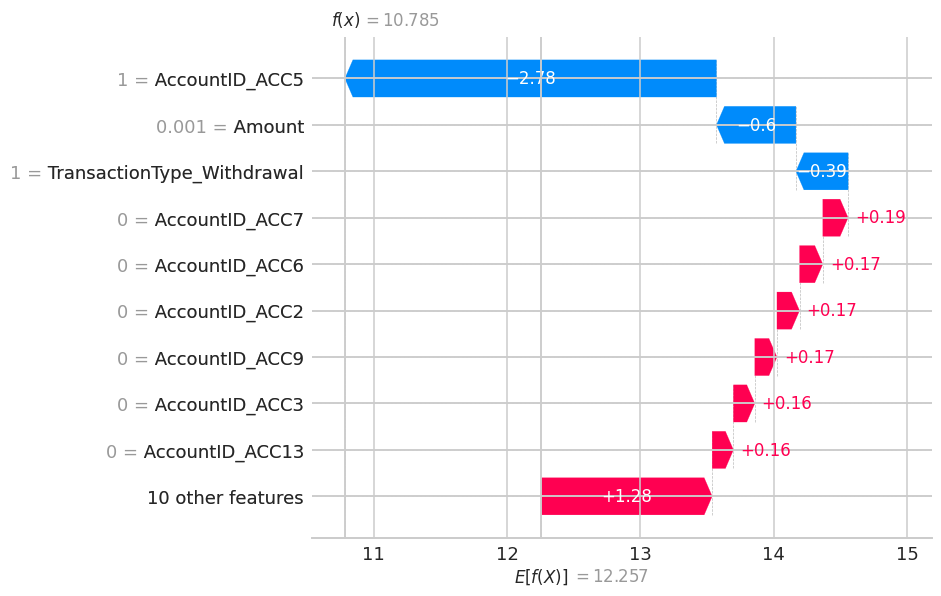

In [70]:
shap.plots.waterfall(shap_values[1])

In [50]:
location_df

,Amount,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,AccountID_ACC1,AccountID_ACC10,AccountID_ACC11,AccountID_ACC12,AccountID_ACC13,AccountID_ACC14,AccountID_ACC15,AccountID_ACC2,AccountID_ACC3,AccountID_ACC4,AccountID_ACC5,AccountID_ACC6,AccountID_ACC7,AccountID_ACC8,AccountID_ACC9
9,0.050578,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.088158,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0.040608,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,0.079657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53,0.092550,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216938,0.098408,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216943,0.015556,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216947,0.054774,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216954,0.042975,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
shap_values_for_row_10 = shap_values_single[9]  # indeks dimulai dari 0

# Menampilkan waterfall plot untuk baris ke-10
shap.plots.waterfall(shap_values_for_row_10)

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [ ]:
# Inisialisasi SHAP Explainer untuk Isolation Forest
explainer = shap.TreeExplainer(iforest_model)

# Mengambil subset fitur yang diperlukan untuk outliers_Tokyo
cols = ['Amount', 'TransactionType', 'AccountID']
outliers_tokyo_df = outliers_Tokyo[cols]

# One-hot encoding untuk 'TransactionType' dan 'AccountID'
outliers_tokyo_encoded = pd.get_dummies(outliers_tokyo_df, columns=['TransactionType', 'AccountID'], drop_first=False)

# Menentukan kolom yang perlu di-scale
cols_to_scale = ['Amount'] + [col for col in outliers_tokyo_encoded.columns if col.startswith('TransactionType_') or col.startswith('AccountID_')]

# Melakukan scaling untuk fitur yang dipilih
mms = MinMaxScaler(feature_range=(0, 1))
outliers_tokyo_encoded[cols_to_scale] = mms.fit_transform(outliers_tokyo_encoded[cols_to_scale])

# Mengecek hasil encoding dan scaling
print(outliers_tokyo_encoded.head())

# Mengambil hanya satu baris untuk analisis SHAP (misalnya baris pertama)
shap_values_single = explainer.shap_values(outliers_tokyo_encoded.iloc[0:1])

# Menampilkan summary plot untuk satu transaksi
shap.summary_plot(shap_values_single, outliers_tokyo_encoded.iloc[0:1])


# Visualize Anomalies and Compare Anomaly Detection Models


In [ ]:
def visualize_anomalies(model, xx, yy, data_df, ax_obj, subplot_title):

    # predict raw anomaly score
    scores_pred = model.decision_function(data_df) * -1
    # prediction of a datapoint category outlier or inlier
    y_pred = model.predict(data_df)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)


    out_df = data_df.copy(deep=True)
    out_df['Outlier'] = y_pred.tolist()
    # discount - inlier feature 1,  profit - inlier feature 2
    inliers_discount = out_df[out_df['Outlier'] == 0]['Amount'].values
    inliers_profit = out_df[out_df['Outlier'] == 0]['Location'].values
    # discount - outlier feature 1, profit - outlier feature 2
    outliers_discount = out_df[out_df['Outlier'] == 1]['Amount'].values
    outliers_profit = out_df[out_df['Outlier'] == 1]['Location'].values

    # Use threshold value to consider a datapoint inlier or outlier
    # threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
    threshold = np.percentile(scores_pred, 100 * outliers_fraction)
    # decision function calculates the raw anomaly score for every point
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    # fill blue map colormap from minimum anomaly score to threshold value
    ax_obj.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
    # draw red contour line where anomaly score is equal to thresold
    a = ax_obj.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    ax_obj.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
    b = ax_obj.scatter(inliers_discount, inliers_profit, c='white',s=20, edgecolor='k')
    c = ax_obj.scatter(outliers_discount, outliers_profit, c='black',s=20, edgecolor='k')


    ax_obj.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
               prop=matplotlib.font_manager.FontProperties(size=10),loc='upper right')

    ax_obj.set_xlim((0, 6))
    ax_obj.set_ylim((0, 1))
    ax_obj.set_xlabel('Amount')
    ax_obj.set_ylabel('Location')
    ax_obj.set_title(subplot_title)

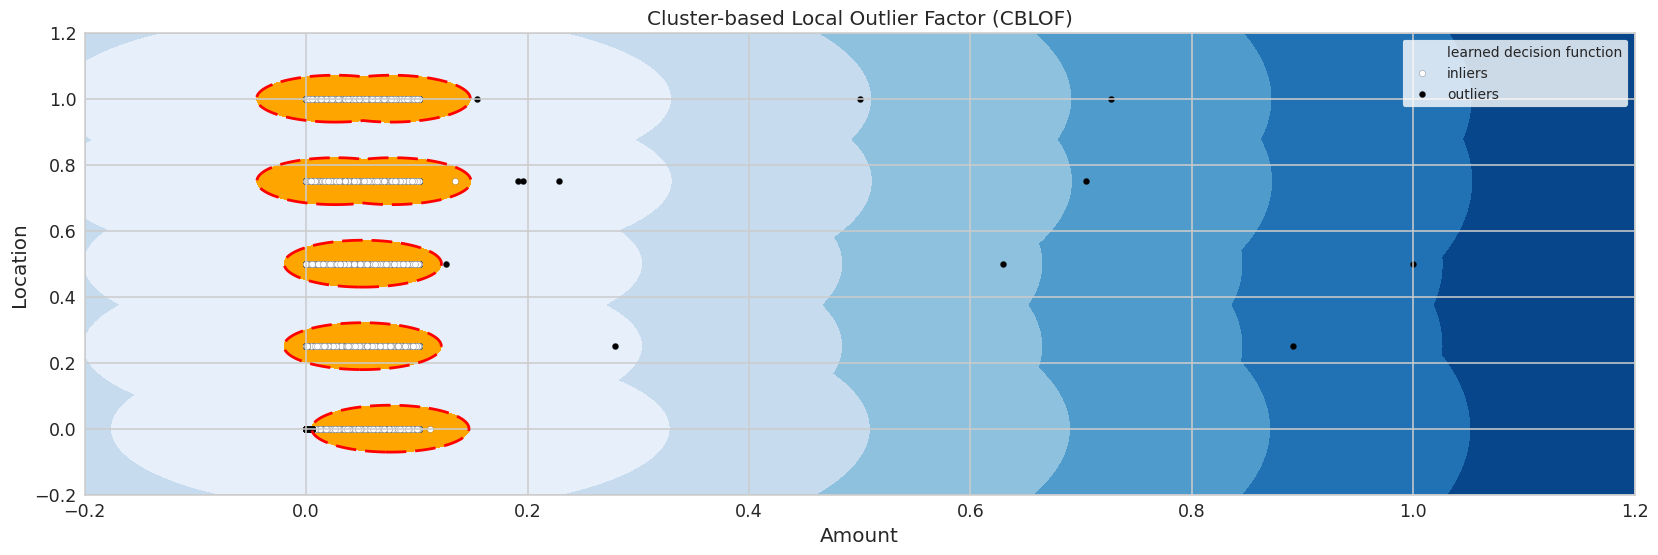

In [ ]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(-0.2, 1.2, 10000), np.linspace(-0.2, 1.2, 10000))
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

ax_objs = [ax]
models = [cblof_model]
plot_titles = ['Cluster-based Local Outlier Factor (CBLOF)']

for ax_obj, model, plot_title in zip(ax_objs, models, plot_titles):
    visualize_anomalies(model=model,
                        xx=xx, yy=yy,
                        data_df=subset_df,
                        ax_obj=ax_obj,
                        subplot_title=plot_title)
plt.axis('tight');


In [76]:
subset_df

,Amount,Location,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,AccountID_ACC1,AccountID_ACC10,AccountID_ACC11,AccountID_ACC12,AccountID_ACC13,AccountID_ACC14,AccountID_ACC15,AccountID_ACC2,AccountID_ACC3,AccountID_ACC4,AccountID_ACC5,AccountID_ACC6,AccountID_ACC7,AccountID_ACC8,AccountID_ACC9
0,95071.92,Tokyo,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,15607.89,London,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,65092.34,London,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,87.87,London,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,716.56,Los Angeles,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216955,62536.88,San Francisco,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
216956,68629.69,London,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
216957,8203.57,London,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
216958,77800.36,New York,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


# AutoEncoder

In [118]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

cols = ['Amount', 'Location']
subset_df = df[cols]

# One-Hot Encoding untuk 'Location'
subset_df = pd.get_dummies(subset_df, columns=['Location'], drop_first=False)

cols_to_scale = ['Amount'] + [col for col in subset_df.columns if col.startswith('Location_')]

# Feature Scaling
mms = MinMaxScaler(feature_range=(0, 1))

outliers_per_location = {}

# Autoencoder model
def build_autoencoder(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(input_dim, activation='sigmoid'))  # Output layer (reconstruction)

    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

for location in df['Location'].unique():
    location_df = subset_df[df['Location'] == location]

    location_df[cols_to_scale] = mms.fit_transform(location_df[cols_to_scale])
    input_dim = location_df.shape[1]
    autoencoder = build_autoencoder(input_dim)
    autoencoder.fit(location_df, location_df, epochs=50, batch_size=32, verbose=0)

    reconstructed = autoencoder.predict(location_df)

    reconstruction_error = np.mean(np.square(location_df - reconstructed), axis=1)
    threshold = np.percentile(reconstruction_error, 95)  # threshold untuk 5% data tertinggi sebagai outlier

    outliers = reconstruction_error > threshold

    location_outliers_df = location_df[outliers]

    total_outliers_location = len(location_outliers_df)

    outliers_per_location[location] = total_outliers_location

    top_5_outliers_location = df.loc[location_outliers_df.index.tolist()][['TransactionID', 'AccountID', 'Merchant', 'TransactionType', 'Location']].head(10)
    print(f"Top 5 Outlier Transactions for {location}:")
    print(top_5_outliers_location)

    bottom_5_outliers_location = df.loc[location_outliers_df.index.tolist()][['TransactionID', 'AccountID', 'Merchant', 'TransactionType', 'Location']].tail(10)
    print(f"Bottom 5 Outlier Transactions for {location}:")
    print(bottom_5_outliers_location)

print("Total Outliers per Location:")
outliers_location_df = pd.DataFrame(list(outliers_per_location.items()), columns=['Location', 'Outlier Count'])
print(outliers_location_df)

total_outliers_all_locations = sum(outliers_per_location.values())
print(f"\nTotal Outliers across all locations: {total_outliers_all_locations}")


1353/1353 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Top 5 Outlier Transactions for Tokyo:
    TransactionID AccountID   Merchant TransactionType Location
49        TXN1920     ACC14  MerchantF        Transfer    Tokyo
74        TXN1120     ACC14  MerchantI        Purchase    Tokyo
96        TXN1508      ACC5  MerchantI        Transfer    Tokyo
185        TXN985      ACC1  MerchantD        Purchase    Tokyo
293       TXN1876      ACC4  MerchantI        Transfer    Tokyo
471        TXN672      ACC8  MerchantH        Transfer    Tokyo
612        TXN632      ACC7  MerchantG        Purchase    Tokyo
674       TXN1854      ACC9  MerchantI      Withdrawal    Tokyo
693       TXN1875      ACC6  MerchantA        Transfer    Tokyo
746        TXN414      ACC9  MerchantI        Purchase    Tokyo
Bottom 5 Outlier Transactions for Tokyo:
       TransactionID AccountID   Merchant TransactionType Location
215506        TXN797     ACC11  MerchantD        Transfer    Tokyo
215620       TXN1065     ACC10  Merchant

# K-means

Top 5 Outlier Transactions for Tokyo:
    TransactionID AccountID   Merchant TransactionType Location
74        TXN1120     ACC14  MerchantI        Purchase    Tokyo
92         TXN873     ACC14  MerchantD        Purchase    Tokyo
134        TXN785     ACC12  MerchantE      Withdrawal    Tokyo
170       TXN1253     ACC14  MerchantC        Purchase    Tokyo
185        TXN985      ACC1  MerchantD        Purchase    Tokyo


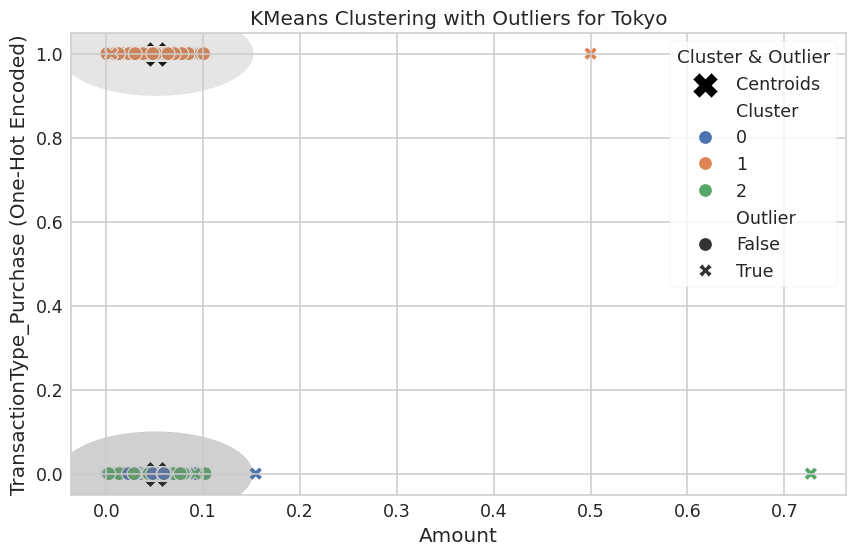

Top 5 Outlier Transactions for London:
   TransactionID AccountID   Merchant TransactionType Location
1        TXN1639     ACC10  MerchantH        Purchase   London
3        TXN1438      ACC6  MerchantE        Purchase   London
63        TXN759     ACC10  MerchantI        Purchase   London
78        TXN453     ACC12  MerchantJ        Purchase   London
82        TXN516      ACC8  MerchantB        Purchase   London


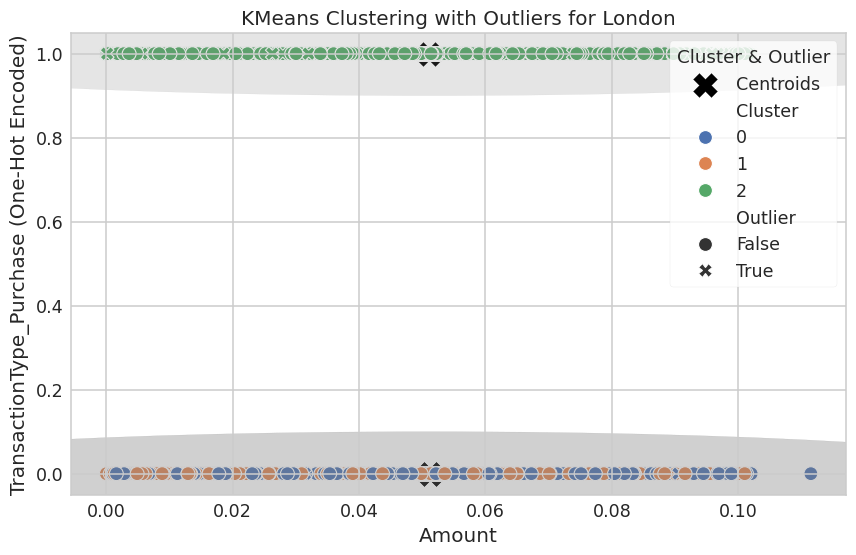

Top 5 Outlier Transactions for Los Angeles:
    TransactionID AccountID   Merchant TransactionType     Location
333        TXN126      ACC2  MerchantI        Transfer  Los Angeles
351       TXN1157      ACC2  MerchantD        Transfer  Los Angeles
437        TXN213     ACC15  MerchantB        Transfer  Los Angeles
569       TXN1933      ACC2  MerchantE        Transfer  Los Angeles
670       TXN1914     ACC15  MerchantA        Transfer  Los Angeles


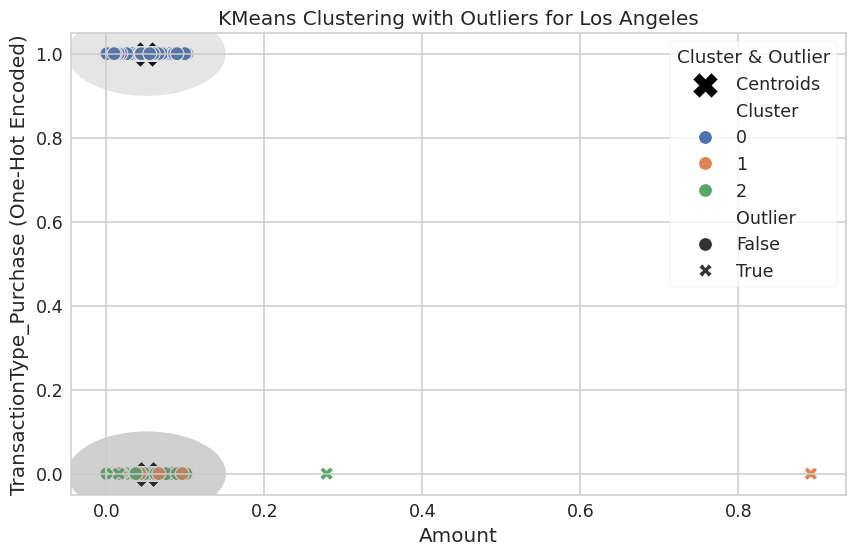

Top 5 Outlier Transactions for San Francisco:
    TransactionID AccountID   Merchant TransactionType       Location
60        TXN1896     ACC14  MerchantF        Transfer  San Francisco
184        TXN302     ACC11  MerchantH      Withdrawal  San Francisco
199       TXN1342     ACC14  MerchantH        Transfer  San Francisco
237       TXN1562     ACC15  MerchantG        Purchase  San Francisco
643       TXN1414      ACC6  MerchantB      Withdrawal  San Francisco


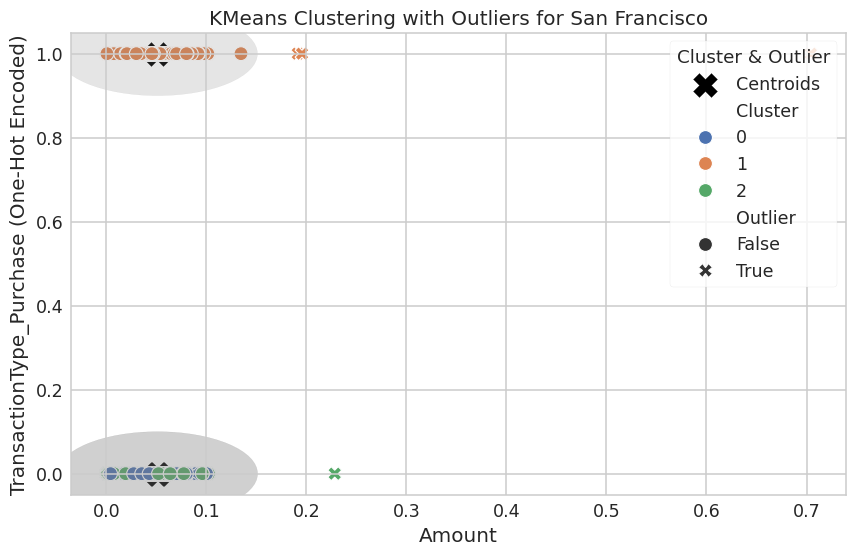

Top 5 Outlier Transactions for New York:
    TransactionID AccountID   Merchant TransactionType  Location
84        TXN1569      ACC1  MerchantE        Transfer  New York
120       TXN1878     ACC11  MerchantA      Withdrawal  New York
142        TXN831     ACC13  MerchantD        Purchase  New York
251       TXN1689      ACC1  MerchantI        Transfer  New York
366       TXN1994      ACC1  MerchantE        Transfer  New York


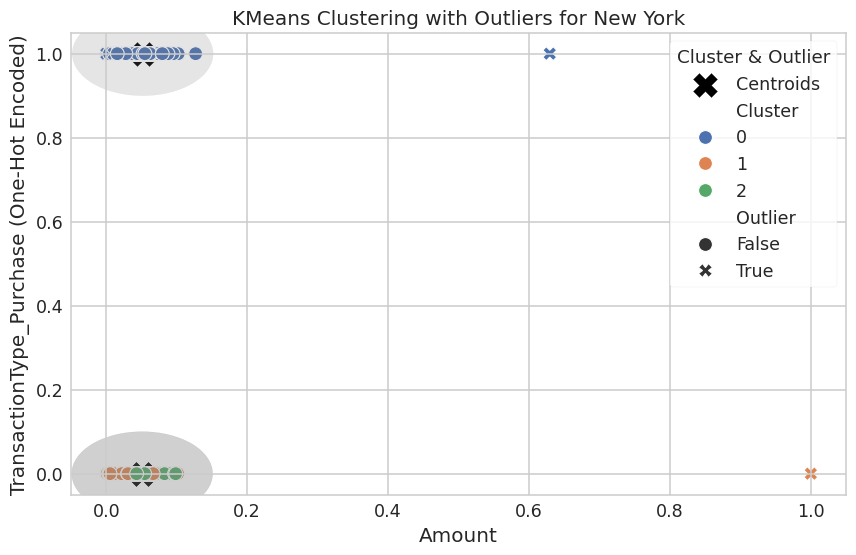

Total Outliers per Location:
        Location  Outlier Count
0          Tokyo           2165
1         London           2168
2    Los Angeles           2167
3  San Francisco           2181
4       New York           2169

Total Outliers across all locations: 10850


In [149]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['Amount', 'TransactionType', 'Location', 'AccountID']
subset_df = df[cols]
subset_df = pd.get_dummies(subset_df, columns=['TransactionType', 'AccountID'], drop_first=False)
cols_to_scale = ['Amount'] + [col for col in subset_df.columns if col.startswith('TransactionType_') or col.startswith('AccountID_')]

mms = MinMaxScaler(feature_range=(0, 1))
subset_df[cols_to_scale] = mms.fit_transform(subset_df[cols_to_scale])

outliers_per_location = {}

for location in df['Location'].unique():
    location_df = subset_df[df['Location'] == location].drop(columns=['Location'])
    n_clusters = 3

    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_model.fit(location_df)

    location_df['Cluster'] = kmeans_model.predict(location_df)
    location_df_without_cluster = location_df.drop(columns=['Cluster'])
    distances = kmeans_model.transform(location_df_without_cluster)

    location_df['Distance to Centroid'] = distances.min(axis=1)
    threshold = location_df['Distance to Centroid'].quantile(0.95)
    location_df['Outlier'] = location_df['Distance to Centroid'] > threshold

    outliers_per_location[location] = location_df['Outlier'].sum()

    outliers_df = location_df[location_df['Outlier'] == True]
    top_5_outliers_location = df.loc[outliers_df.index.tolist()][['TransactionID', 'AccountID', 'Merchant', 'TransactionType', 'Location']].head(5)
    print(f"Top 5 Outlier Transactions for {location}:")
    print(top_5_outliers_location)

    plt.figure(figsize=(10, 6))
    cluster_centers = kmeans_model.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='black', marker='X', label="Centroids")
    sns.scatterplot(x=location_df['Amount'], y=location_df['TransactionType_Purchase'], hue=location_df['Cluster'],
                    style=location_df['Outlier'], palette='deep', markers=["o", "X"], s=100)

    plt.title(f'KMeans Clustering with Outliers for {location}')
    plt.xlabel('Amount')
    plt.ylabel('TransactionType_Purchase (One-Hot Encoded)')
    plt.legend(title="Cluster & Outlier", loc='upper right')

    for center in cluster_centers:
        circle = plt.Circle((center[0], center[1]), 0.1, color='gray', fill=True, alpha=0.2)
        plt.gca().add_artist(circle)

    plt.show()

print("Total Outliers per Location:")
outliers_location_df = pd.DataFrame(list(outliers_per_location.items()), columns=['Location', 'Outlier Count'])
print(outliers_location_df)

total_outliers_all_locations = sum(outliers_per_location.values())
print(f"\nTotal Outliers across all locations: {total_outliers_all_locations}")
